<a href="https://colab.research.google.com/github/akiabe/coursera-ml-stanford/blob/master/ml_ex8_Anomaly_detection_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Implement an anomaly detection algorithm to detect
anomalous behavior in server computers.**

In [0]:
# Import library
import numpy as np
import scipy.io as scio
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
# Load training data
data = scio.loadmat('ex8data1.mat')
X = data['X']
X_val = data['Xval']
y_val = data['yval'].ravel()
print ("X shape: " + str(X.shape))
print ("X_val shape: " + str(X_val.shape))
print ("y_val shape: " + str(y_val.shape))

X shape: (307, 2)
X_val shape: (307, 2)
y_val shape: (307,)


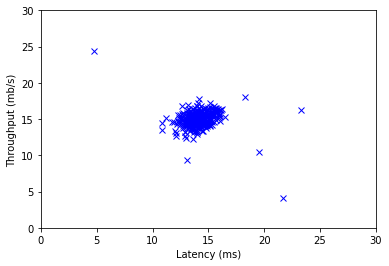

In [22]:
# Visualize data
plt.figure()
plt.plot(X[:, 0], X[:, 1], 'bx')
plt.xlim(0, 30)
plt.ylim(0, 30)
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)')
plt.show()

In [0]:
# Estimate the gaussian distribuition for each of the features
def estimate_gaussian(X):
  """
  Arguments:
  X -- examples (m, n)

  Returns:
  mu -- mean of each feature (n, 1)
  sigma2 -- variance of each features (n, 1)

  """
  mu = np.mean(X, axis=0)
  sigma2 = np.var(X, axis=0)

  return mu, sigma2

In [0]:
# Compute the probability density function for a gaussian distribution
def multivariate_gaussian(X, mu, Sigma2):
  """
  Arguments:
  X -- examples (m, n)
  mu -- mean of each feature (n, 1)
  sigma2 -- variance of each features (n, 1)

  Returns:
  p -- probability density function of the examples X under the multivariate
       gaussian distribution with parameters mu and sigma2 (n, 1)

  """
  k = len(mu)

  if len(Sigma2.shape) == 1:
    Sigma2 = np.diag(Sigma2)
    
  X_mu = X - mu
  p = (2 * np.pi) ** (-k / 2.0) * np.linalg.det(Sigma2) ** (-0.5) \
        * np.exp(-0.5 * np.sum(np.dot(X_mu, np.linalg.pinv(Sigma2)) * X_mu, axis=1))
  
  return p

In [0]:
# Estimate and compute probability density of the fitted gaussian distribuition
mu, sigma2 = estimate_gaussian(X)
p = multivariate_gaussian(X, mu, sigma2)

In [0]:
# Visualize the dataset and its estimated distribution
def visualize_fit(X, mu, sigma2):
    l = np.arange(0, 35.5, 0.5)
    X1, X2 = np.meshgrid(l, l)

    X_tmp = np.vstack((X1.ravel(), X2.ravel())).T
    Z = multivariate_gaussian(X_tmp, mu, sigma2)
    Z.resize(X1.shape)
    plt.plot(X[:, 0], X[:, 1], 'bx')

    if np.sum(np.isinf(Z)) == 0:
        plt.contour(X1, X2, Z, 10.0 ** np.arange(-20, 0, 3))

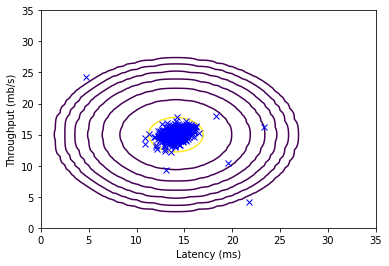

In [35]:
# Visualize the contours of the fitted gaussian distribution
plt.figure()
visualize_fit(X, mu, sigma2)
plt.xlim(0, 35)
plt.ylim(0, 35)
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)')
plt.show()

In [0]:
# Select the threshold epsilon using the F1 score on a cross validation set
def select_threshold(y_val, p_val):
  """
  Argument:
  y_val -- label from validation set (n, 1)
  p_val -- probability density from validation set (n, 1)

  Returns:
  best_epsilon -- the best threshold selectiong outliers
  best_F1 -- the best F1 score

  """
  best_epsilon = 0.0
  best_F1 = 0.0

  step_size = (np.max(p_val) - np.min(p_val)) / 1000
  
  for epsilon in np.arange(min(p_val), max(p_val), step_size):
    predictions = p_val < epsilon   # Get binary vector(0/1)
    
    # The number of true positive
    tp = np.sum(predictions[np.nonzero(y_val == True)])
    # The number of false positive
    fp = np.sum(predictions[np.nonzero(y_val == False)])
    # The number of false negative
    fn = np.sum(y_val[np.nonzero(predictions == False)] == True)
    
    if tp != 0:
       prec = 1.0 * tp / (tp + fp)  # prec -- Precision
       rec = 1.0 * tp / (tp + fn)  # rec -- Recall
       F1 = 2.0 * prec * rec / (prec + rec)
       
       if F1 > best_F1:
         best_F1 = F1
         best_epsilon = epsilon
    
  return best_epsilon, best_F1

In [37]:
# Compute F1 score of cross validation examples
p_val = multivariate_gaussian(X_val, mu, sigma2)
epsilon, F1 = select_threshold(y_val, p_val)

print ("Best epsilon found using cross validation: " + str(epsilon))
print ("Best F1 on cross validation set: " + str(F1))
print ("Correct value of epsilon: 8.99e-05")

Best epsilon found using cross validation: 8.990852779269495e-05
Best F1 on cross validation set: 0.8750000000000001
Correct value of epsilon: 8.99e-05


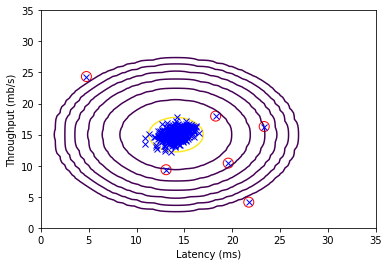

In [38]:
# Visualize the contours of the fitted gaussian distribution
outliers = np.nonzero(p < epsilon)

plt.figure()
visualize_fit(X, mu, sigma2)
plt.scatter(X[outliers, 0], X[outliers, 1], facecolors='none', edgecolors='r', s=100)
plt.xlim(0, 35)
plt.ylim(0, 35)
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)')
plt.show()

In [39]:
# Implement anomaly detection algorithm on multidimensional data
# Load training data
data2 = scio.loadmat('ex8data2.mat')
X2 = data2['X']
X2_val = data2['Xval']
y2_val = data2['yval'].ravel()
print ("X2 shape: " + str(X2.shape))
print ("X2_val shape: " + str(X2_val.shape))
print ("y2_val shape: " + str(y2_val.shape))

X2 shape: (1000, 11)
X2_val shape: (100, 11)
y2_val shape: (100,)


In [42]:
# Estimate and compute probability density of the fitted gaussian distribuition
mu, sigma2 = estimate_gaussian(X2)

# Training set
p = multivariate_gaussian(X2, mu, sigma2)

# Cross validation set
p_val = multivariate_gaussian(X2_val, mu, sigma2)

# Find the best threshold
epsilon, F1 = select_threshold(y2_val, p_val)

print ("Best epsilon found using cross validation: " + str(epsilon))
print ("Best F1 on cross validation set: " + str(F1))
print ("# Outliers found: ", np.sum(p < epsilon))
print ("Correct value of epsilon: 1.38e-18")

Best epsilon found using cross validation: 1.377228890761358e-18
Best F1 on cross validation set: 0.6153846153846154
# Outliers found:  117
Correct value of epsilon: 1.38e-18
